# Identifying the Risk Factors of Heart Disease.

*We will do an Exploratory Data Analysis to identify the factors that are associated with Coronary Heart Disease (CHD) and then build a Decision Tree Classifier that can predict the ten year risk of a patient developing CHD, given the certain risk factors.
Furthermore, we will analyze the relationships present in this dataset, and come up with answers to questions susch as:*

- *Are patients with diabetes more likely to develop heart disease at an early age?*
- *Is there a certain demographic group that is at higher risk of heart disease than others?*
- *Are smokers more likely to develop heart disease than non-smokers?*
- *Does frequent exercise lower the risk of developing heart disease?*
- *How major is the contribution of Cholesterol in developing CHD?*
- *Does the Body Mass Index have any correlation with CHD?*

### Dataset

*The Dataset comes from the Framingham Heart Study and is publicly available from the BioLINCC website upor request.*

*The Framingham Heart Study was a turning point in identifying the risk factors of heart disease, and is one of the most important epidemiological studies conducted. To better understand heart disease and the measures that could be taken to combat it, the Framingham Heart Study (FHS) was established in the late 1940's. It was a joint project of Boston University and the National Heart, Lung, and Blood Institute (NHLBI). 
A large cohort of initially healthy patients between the age group 30 and 59 in the city of Framingham, Massachusetts were tracked for a period of 20 years, to better understand cardiovascular disease. The study was conducted with an initial cohort of 5209 patients. The aim of the study was to enroll people free of the disease, and see who developed the disease in the next 20 years. Every two years, the participants would have to report to a testing center, where an examination was conducted. The patients were examined and their health information was updated.
The data collected from this study allowed for a better understanding of the risk factors of heart disease. Medical interventions then took place based on the findings of the FHS. The FHS has contributed greatly in reducing mortality rates associated with CHD, and has corrected many clinical misconceptions about heart disease.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('framingham.csv')

In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


*The data frame consists of 16 variables. 15 independent variables, or risk factors, and 1 dependent variable.*

- *Male : A value of 1 indicates that the participant is male, and 0 indicates they are female.*
- *Age: The age of the participant.*
- *Education Level: 1-High School, 2-High School Diploma/GED, 3-College, 4-Degree.*
- *currentSmoker: 1- The participant is a current smoker, 0- participant does not smoke currently.*
- *cigsPerDay: Number of cigarettes smoked per day.*
- *BPMeds: Amount of Anti-hypertensive  medication the participant is on.*
- *prevalentStroke: 0- no prevalence of stroke, 1-has had occurrences of stroke.*
- *prevalentHyp: 0-no prevalence of hypertension, 1-prevalence of hypertension.*
- *diabetes: 0-no diabetes, 1-has diabetes.*
- *totChol: Total cholesterol.*
- *sysBP: Systolic blood pressure.*
- *diaBP: Diastolic blood pressure.*
- *BMI: Body Mass Index.*
- *Heart Rate: Heart rate in bpm.*
- *Glucose: Glucose level (mg/dL).*
- *TenYearCHD : The 10 year risk of coronary heart disease(CHD). This is our Target Dependent Variable.*

### Exploratory Data Analysis

*Let's perform some visualizations, to get insights on the data. There are many risk factors such as smoking and high Cholesterol levels that were found by the Framingham Heart Study to increase 10 year risk of CHD. We will look at these factors and see if we can find these relationships in the dataset.*

*First let's check the demographic information of the participants.*

*We will create a countplot of the 'male' variable to see the distribution of men and women.*

Percentages of women (0) and men (1):


0    0.570755
1    0.429245
Name: male, dtype: float64

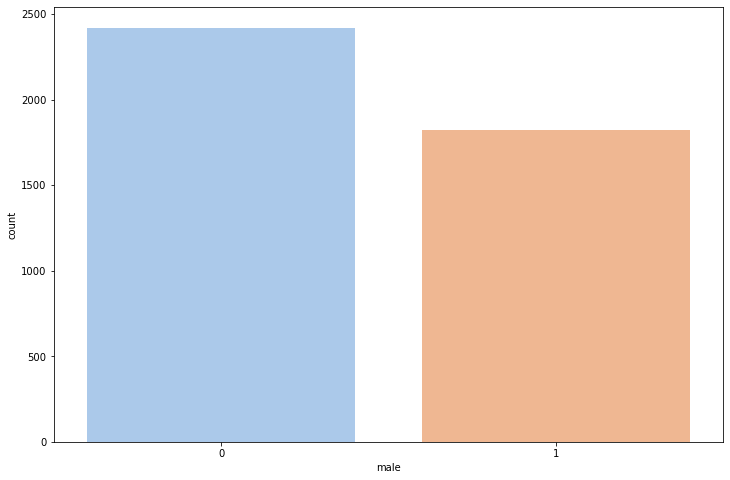

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'male', data = df, palette='pastel')
print('Percentages of women (0) and men (1):')
df['male'].value_counts(normalize=True)

*We can see that men represent about 43% of the sample while women the 57%.*

*Now, we will create a distribution plot of the 'age' variable to visualize better how the age of the participants is spread across the sample.*

<AxesSubplot:xlabel='age', ylabel='Count'>

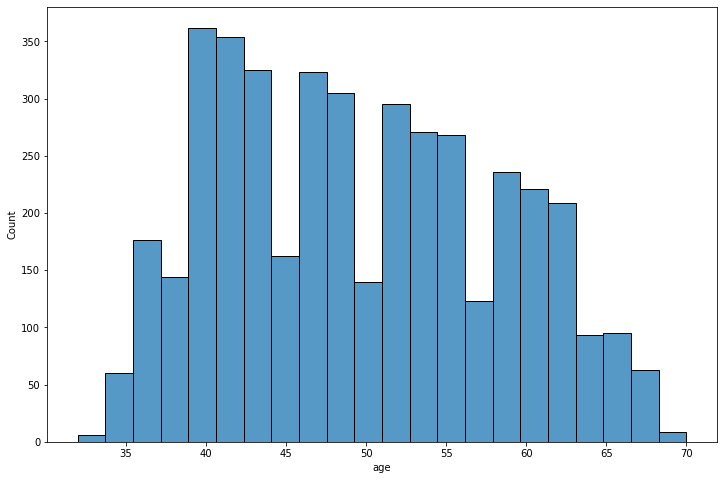

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(df['age'], palette='pastel')

*We can clearly see that the majority of the participants reside between the ages of 35 - 65 years.*

*Now we will do a countplot of the Education Level.*

<AxesSubplot:xlabel='education', ylabel='count'>

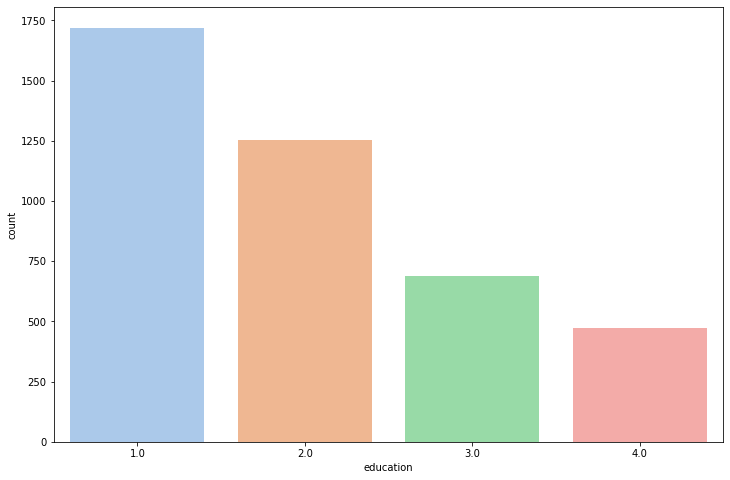

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'education', data = df, palette = 'pastel')

*The majority of the participants have either attended High School or have a High School Diploma/ GED.*

*Now, we will see the distribution between smokers and not smokers.*

Percentages of smokers (1) and non-smokers (0): 


0    0.505896
1    0.494104
Name: currentSmoker, dtype: float64

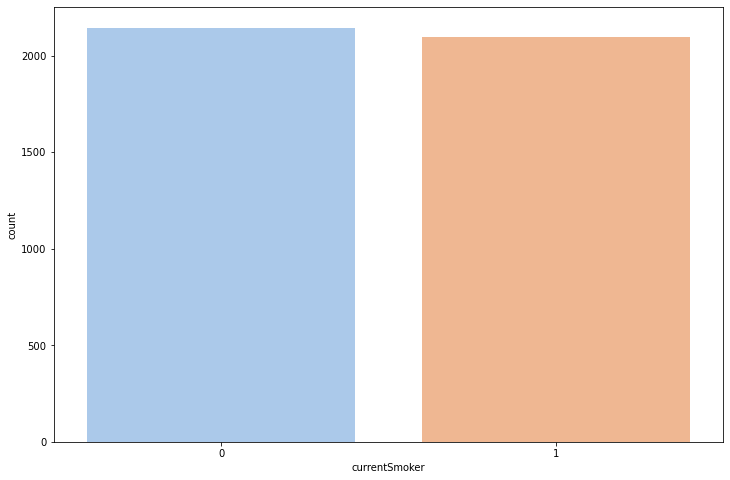

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'currentSmoker', data = df, palette = 'pastel')
print('Percentages of smokers (1) and non-smokers (0): ')
df['currentSmoker'].value_counts(normalize=True)

*Both the smokers and non smokers are represented about equally in our sample.*

*Now, let's look at some risk factors.*

*Let's see if we can find some correlation between the amount of cigarettes per day and the development of CHD.*

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

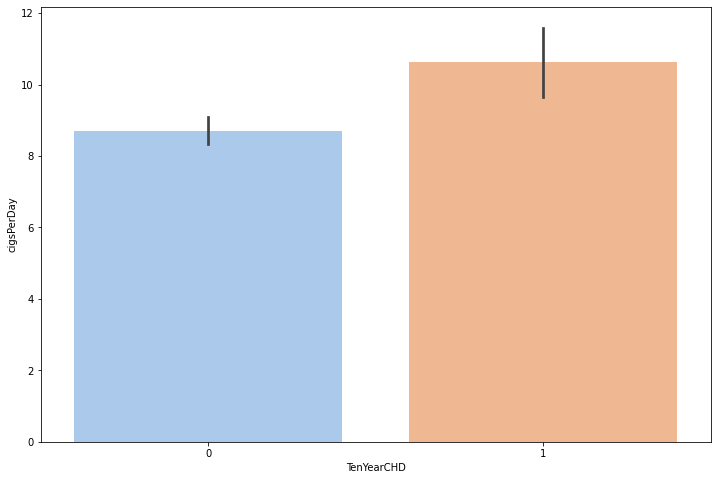

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'cigsPerDay', data = df, palette = 'pastel')

*We can see that patients who have a ten year CHD risk, smoke more cigarettes per day than those who don't.*

*How about the relationship between Total Cholesterol and ten year CHD.*

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

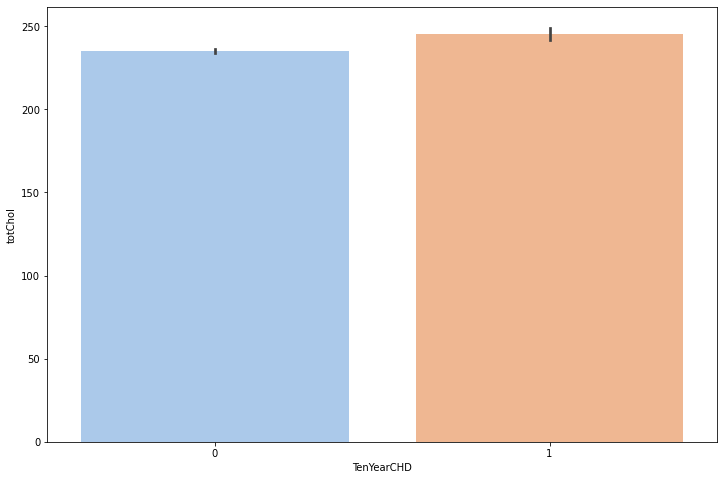

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'totChol', data = df, palette = 'pastel')

*It seems that participants with a ten year CHD risk have slightly higher levels of Total Cholesterol.*

*How about the relationship between Body Mass Index (BMI) and the ten year CHD risk.*

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

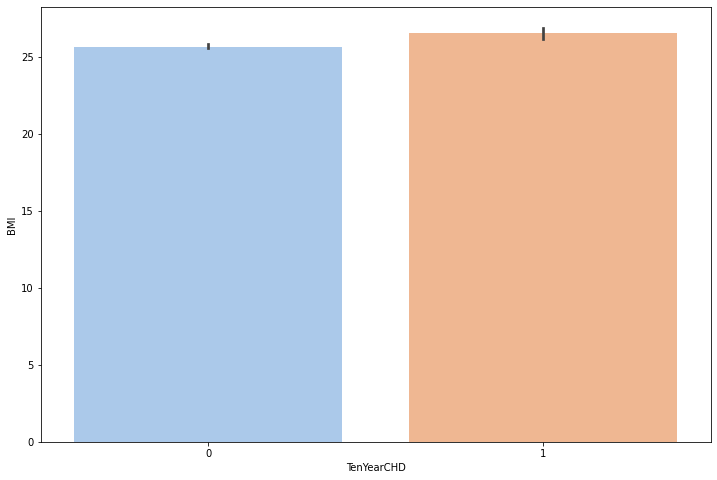

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'BMI', data = df, palette = 'pastel')

*It seems that participants with a ten year CHD risk have slightly higher levels of Body Mass Index.*

*Now let's inspect the relationship between prevalence of Stroke and prevalence of Hypertension with the ten year CHD risk.*

<AxesSubplot:xlabel='TenYearCHD', ylabel='prevalentStroke'>

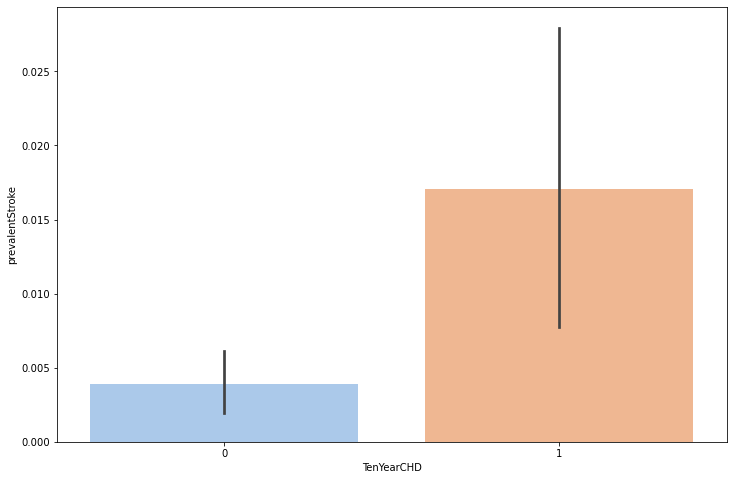

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'prevalentStroke', data = df, palette = 'pastel')

<AxesSubplot:xlabel='TenYearCHD', ylabel='prevalentHyp'>

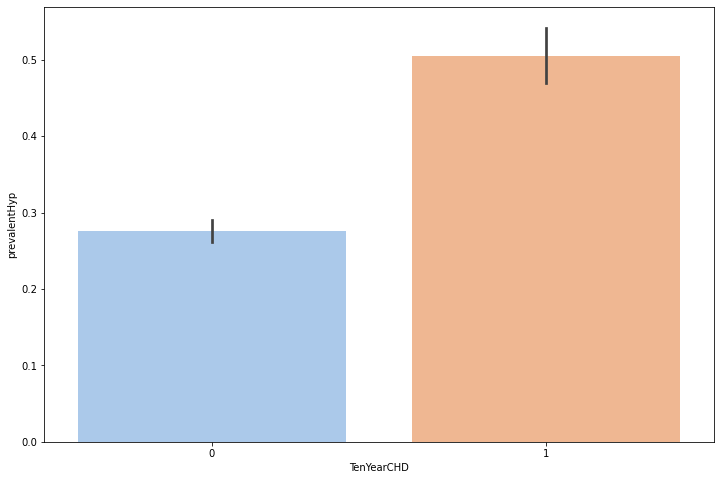

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'prevalentHyp', data = df, palette = 'pastel')

*From the above graphs we can clearly deduce that there's a big correlation between prevalence of Stroke and Hypertension and the ten year CHD risk.*

*What about Glucose levels and diabetes.*

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

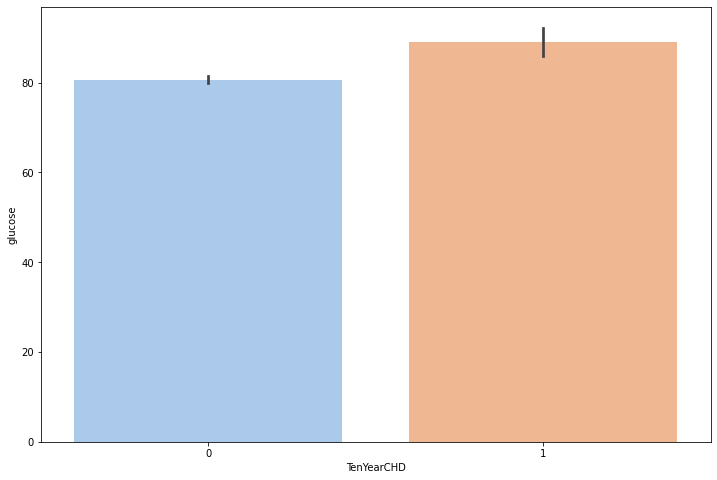

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'glucose', data = df, palette = 'pastel')

<AxesSubplot:xlabel='TenYearCHD', ylabel='diabetes'>

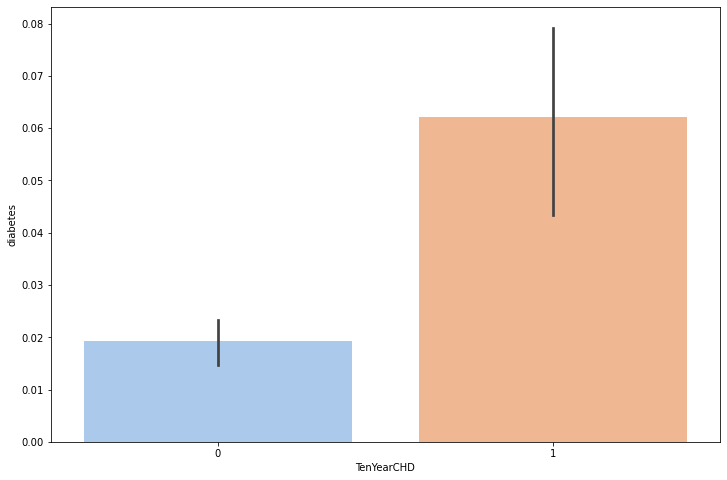

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'diabetes', data = df, palette = 'pastel')

*Participants with higher glucose levels are more likely to have a ten year CHD risk, while the prevalence of diabetes is a significant factor in developing a ten year CHD risk.*

*Finally, let's see the relationship between systolic, diastolic blood pressure and the ten year CHD risk.*

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

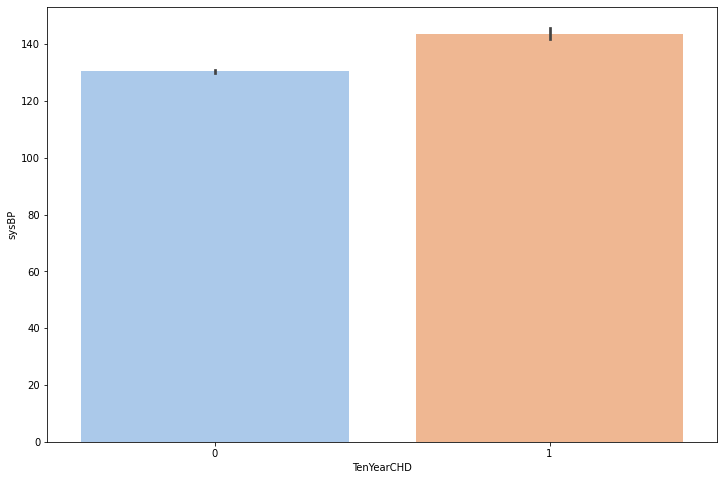

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'sysBP', data = df, palette = 'pastel')

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

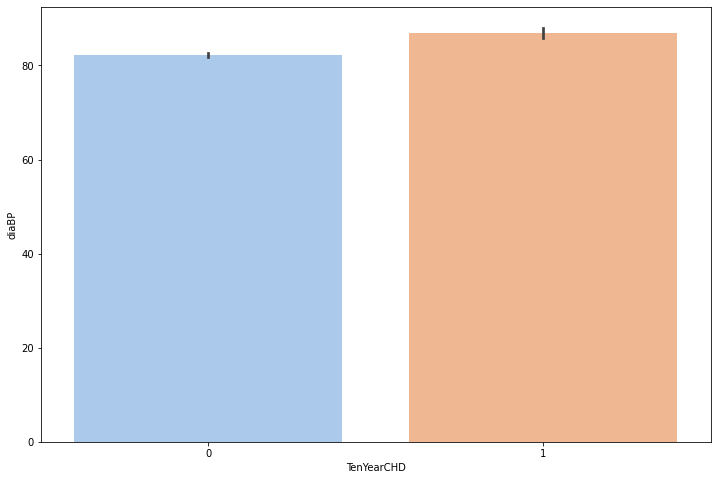

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'TenYearCHD', y = 'diaBP', data = df, palette = 'pastel')

*It can be seen that  blood pressure is linked with coronary heart disease. Participants with a ten year CHD risk seem to have higher blood pressure than the one's who don't.*

### Data Preprocessing - Missing Values

In [22]:
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<AxesSubplot:>

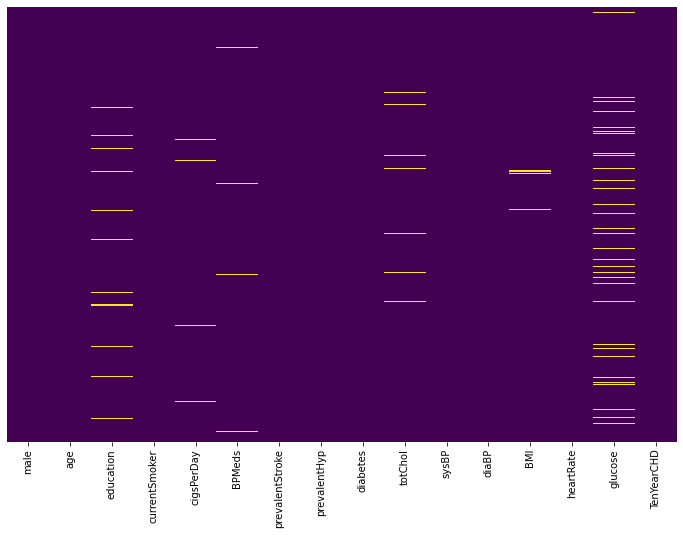

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

*There are some columns with missing values in the dataset. There are many methods to treat missing values, such as imputing with the mean value of the column or some other value, but for the sake of simplicity and due to the fact that the missing values are a small proportion of the sample, we are just going to drop them.*

In [26]:
df = df.dropna()

<AxesSubplot:>

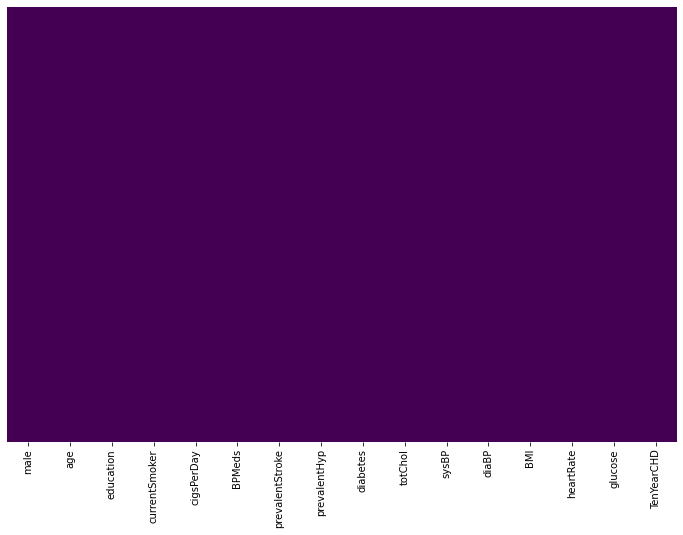

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

### Create a Baseline model, in order to benchmark our model.

*When building machine learning models, it is essential to have a baseline by which you can compare the performance of the model you are building. The baseline you set gives you the benefit of knowing whether you are on track and whether your model is improving or not.*

In [28]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [29]:
X = df.drop('TenYearCHD',axis =1)
y = df['TenYearCHD']

In [30]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X,y)
dummy_clf.score(X,y)

0.7460360852925095

### Imbalanced Dataset Handling

In [32]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.847731
1    0.152269
Name: TenYearCHD, dtype: float64

*As we can see by performing a quick value count on our target variable, the dataset is imbalanced, and more than 80% of the data are participants who don't have a ten year CHD risk. This bias in the training dataset can influence our machine learning algorithm possibly leading it to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.*

*In order to handle that we will use a combination of Oversampling and Undersampling.*

*Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset. While, Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
Interesting results may be achieved by combining both random oversampling and undersampling. For example, a modest amount of oversampling can be applied to the minority class to improve the bias towards these examples, whilst also applying a modest amount of undersampling to the majority class to reduce the bias on that class. This can result in improved overall performance compared to performing one or the other techniques in isolation. This could be implemented using imbalanced-learn by using a RandomOverSampler with sampling_strategy set to 0.1 (10%), then using a RandomUnderSampler with a sampling_strategy set to 0.5 (50%).*

### Import Libraries

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

### Create Pipeline

In [64]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

### Fit the Training Data to the Pipeline

In [65]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

### Make predictions on the Testing Data

In [66]:
predictions = pipeline.predict(X_test)

### Evaluate the model

In [68]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predictions))
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1084
           1       0.84      0.97      0.90      1087

    accuracy                           0.90      2171
   macro avg       0.91      0.90      0.90      2171
weighted avg       0.91      0.90      0.90      2171



0.8959005066789498

*Our model seems to perform reasonably well, having high precisio and recall for both labels and has an accuracy of ~0.90, that beats the baseline accuracy of the dummy model.*